In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

churn = pd.read_csv('./BankChurners.csv')
churn.head()
churn = churn.replace(['Unknown'], np.nan)
churn.dropna(inplace=True)
churn = churn[['Customer_Age','Income_Category','Total_Trans_Ct','Avg_Utilization_Ratio']]
churn = pd.get_dummies(churn)
print(churn.shape)
churn.describe()


(7081, 8)


,Customer_Age,Total_Trans_Ct,Avg_Utilization_Ratio,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K
count,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.00000,7081.000000
mean,46.347691,64.503319,0.282313,0.080780,0.199407,0.155769,0.16975,0.394295
std,8.041225,23.809330,0.278731,0.272516,0.399583,0.362662,0.37544,0.488733
min,26.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,41.000000,44.000000,0.026000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,46.000000,67.000000,0.186000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,52.000000,80.000000,0.515000,0.000000,0.000000,0.000000,0.00000,1.000000
max,73.000000,134.000000,0.999000,1.000000,1.000000,1.000000,1.00000,1.000000


Text(0, 0.5, 'PCA 2')

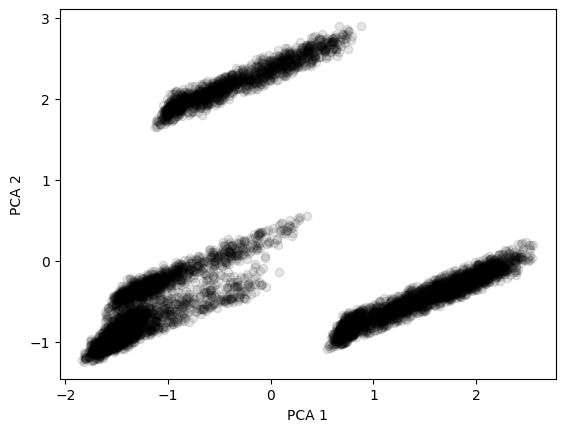

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X = StandardScaler().fit_transform(churn)

pca = PCA(n_components=8)
principalComp = pca.fit_transform(X)

PCA_components = pd.DataFrame(principalComp)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


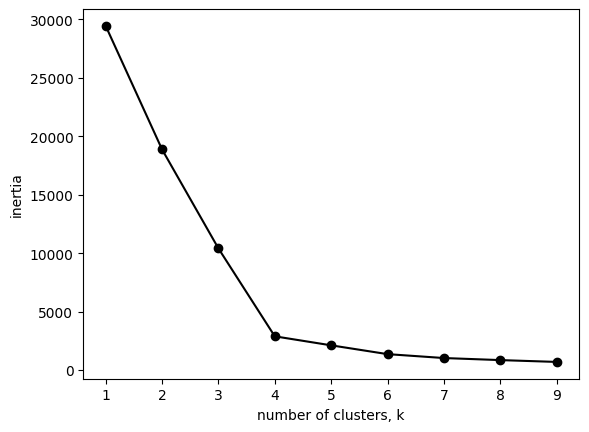

In [74]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k,n_init=10)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

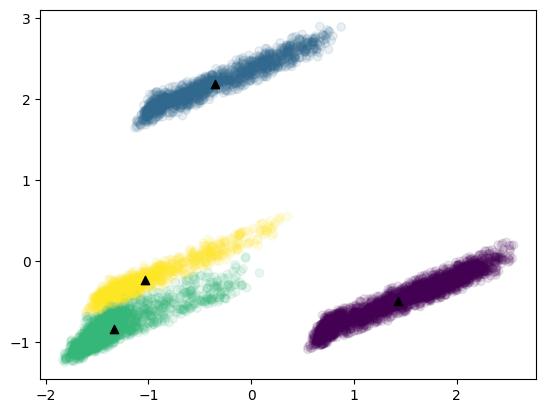

In [75]:
PCA_components.columns = PCA_components.columns.astype(str)
model = KMeans(n_clusters=4,n_init=10,init='k-means++').fit(PCA_components)
cluster_labels = pd.Series(model.labels_, name='cluster')
churn = churn.join(cluster_labels.to_frame())
plt.scatter(PCA_components["0"], PCA_components["1"], alpha=.1, c=cluster_labels)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
 marker='^', color='black')
